# Neural Networks for Classification

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework, and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

The following is a function to load the data, that we are going to use later in the notebook.

In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

## TO DO 0
Place your ID ("numero di matricola") that will be used as seed for random generator. Change the ID number in case you observe unexpected behaviours and want to test if this is due to randomization (e.g., train/test split). If you change the ID number explain why you have change it.

In [3]:
ID = 2019136 # COMPLETE
np.random.seed(ID)

Now we load the dataset using the function above.

In [4]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]
X, y = load_fashion_mnist("data")
# rescale the data
X = X / 255.0

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rest as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [61 43 58 44 52 43 50 50 58 41]


The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


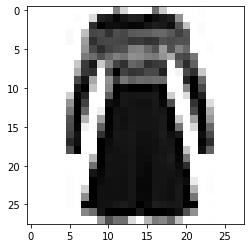

LABEL: 3
INPUT:


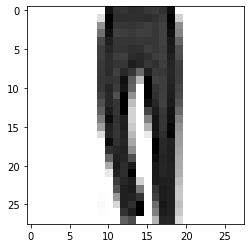

LABEL: 1
INPUT:


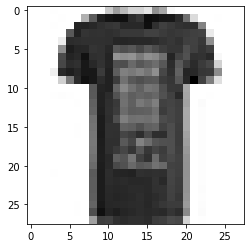

LABEL: 0


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,300)

## TO DO 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. You can evaluate the architectures you chose using the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture. The code below provides some architectures you can use, but you can choose other ones if you prefer.


In [8]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons

#import panda's Dataframe for a better visualization of the results
import pandas as pd

#these are examples of possible architectures you can test, but feel free to use different architectures! 
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,), (100,),]}

mlp_cv = MLPClassifier(max_iter=1000, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1,random_state=ID)
clf = GridSearchCV(mlp_cv, hl_parameters).fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found: ", clf.best_params_)
print("Score with best parameters: ", clf.best_score_)
print("\nAll scores on the grid: ", pd.DataFrame.from_dict({name_score : score for (name_score, score) in clf.cv_results_.items() if "score" in name_score}))

RESULTS FOR NN

Best parameters set found:  {'hidden_layer_sizes': (100,)}
Score with best parameters:  0.7779999999999999

All scores on the grid:     mean_score_time  std_score_time  split0_test_score  split1_test_score  \
0         0.002601        0.000801               0.72               0.74   
1         0.003202        0.001940               0.76               0.77   
2         0.003204        0.001722               0.19               0.39   
3         0.005003        0.001674               0.76               0.75   
4         0.003601        0.001357               0.80               0.77   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0               0.71               0.81               0.64            0.724   
1               0.78               0.81               0.70            0.764   
2               0.12               0.35               0.46            0.302   
3               0.76               0.82               0.71            0.760   

## TO DO 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?

The accuracies obtained by the different architectures show that in this specific case it is more convenient to add more neurons to a single hidden layer rather than adding more layers to the network. In particular, a MLP with one hidden layer made of 100 neurons outperformed all the other multi-layer architectures, and the second best architecture according to GridSearchCv is another one-layer architecture, (50,). 

## TO DO 3

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above (and learning the NN weights from the entire training set). Use verbose=True
in input so to see how loss changes in iterations. (Note that the loss used by the MLPclassifier may be different from the 0-1 loss, also called *accuracy*.)

In [9]:
#get training and test error for the best NN model from CV

best_mlp = MLPClassifier((100,), max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1,random_state=ID, verbose='true').fit(X_train, y_train)

training_error = 1. - best_mlp.score(X_train,y_train)

test_error = 1. - best_mlp.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 2.12459387
Iteration 2, loss = 1.63687696
Iteration 3, loss = 1.06151193
Iteration 4, loss = 0.84408760
Iteration 5, loss = 0.70260586
Iteration 6, loss = 0.59324016
Iteration 7, loss = 0.80820299
Iteration 8, loss = 0.65140372
Iteration 9, loss = 0.48667616
Iteration 10, loss = 0.46094028
Iteration 11, loss = 0.42654322
Iteration 12, loss = 0.39964633
Iteration 13, loss = 0.48941503
Iteration 14, loss = 0.36639907
Iteration 15, loss = 0.32496897
Iteration 16, loss = 0.31518145
Iteration 17, loss = 0.28862065
Iteration 18, loss = 0.26262648
Iteration 19, loss = 0.27871456
Iteration 20, loss = 0.20953811
Iteration 21, loss = 0.21577194
Iteration 22, loss = 0.18570888
Iteration 23, loss = 0.17608647
Iteration 24, loss = 0.15336007
Iteration 25, loss = 0.18127273
Iteration 26, loss = 0.23086335
Iteration 27, loss = 0.43487164
Iteration 28, loss = 0.23354219
Iteration 29, loss = 0.16992170
Iteration 30, loss = 0.14732588
Iteration 31, loss = 0.13593472
Iteration 32, los

## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before, but you can try more if you want!

In [10]:
X = X[permutation]
y = y[permutation]

m_training = 5000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([515, 469, 516, 476, 514, 503, 506, 508, 485, 508], dtype=int64))

## TO DO 4

Now train the NNs with the added data points. Feel free to try more different architectures than before if you want, or less if it takes too much time. You can use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [11]:
#for NN we try the same architectures as before
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,), (100,)]}

mlp_large_cv = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1,random_state=ID)
clf = GridSearchCV(mlp_cv, hl_parameters).fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found: ", clf.best_estimator_)
print("Score with best parameters: ", clf.best_score_)
print("\nAll scores on the grid: ", pd.DataFrame.from_dict({name_score : score for (name_score, score) in clf.cv_results_.items() if "score" in name_score}))

RESULTS FOR NN

Best parameters set found:  MLPClassifier(learning_rate_init=0.1, max_iter=1000, random_state=2019136,
              solver='sgd')
Score with best parameters:  0.8399999999999999

All scores on the grid:     mean_score_time  std_score_time  split0_test_score  split1_test_score  \
0         0.009406        0.003075              0.805              0.799   
1         0.019612        0.001627              0.837              0.854   
2         0.013409        0.008317              0.494              0.775   
3         0.017813        0.002317              0.844              0.824   
4         0.028817        0.010133              0.848              0.856   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0              0.786              0.732              0.793           0.7830   
1              0.838              0.817              0.832           0.8356   
2              0.341              0.743              0.652           0.6010   
3     

## TO DO 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

As before, by enlarging the training set (i used 5000 samples due to an otherwise long computational time) we have that the best model is still the (100,) one, with an improved accuracy of 0.839.

## TO DO 6

Get the train and test error for the best NN you obtained with 10000 points. This time you can run for 100 iterations if you cannot run for 300 iterations. 


In [12]:
#get training and test error for the best NN model from CV

best_mlp_large = MLPClassifier((100,), max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1,random_state=ID, verbose='true').fit(X_train, y_train)

training_error = 1. - best_mlp_large.score(X_train,y_train)

test_error = 1. - best_mlp_large.score(X_test,y_test)

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 1.17566990
Iteration 2, loss = 0.60010380
Iteration 3, loss = 0.53933940
Iteration 4, loss = 0.45566561
Iteration 5, loss = 0.41439261
Iteration 6, loss = 0.38532882
Iteration 7, loss = 0.38498501
Iteration 8, loss = 0.35738614
Iteration 9, loss = 0.33435212
Iteration 10, loss = 0.31390685
Iteration 11, loss = 0.30741440
Iteration 12, loss = 0.29909114
Iteration 13, loss = 0.27737292
Iteration 14, loss = 0.27367806
Iteration 15, loss = 0.25741034
Iteration 16, loss = 0.25874017
Iteration 17, loss = 0.23082231
Iteration 18, loss = 0.22493170
Iteration 19, loss = 0.22899988
Iteration 20, loss = 0.21326272
Iteration 21, loss = 0.22871131
Iteration 22, loss = 0.19232304
Iteration 23, loss = 0.18345231
Iteration 24, loss = 0.17481320
Iteration 25, loss = 0.19814070
Iteration 26, loss = 0.16996135
Iteration 27, loss = 0.16299882
Iteration 28, loss = 0.15226043
Iteration 29, loss = 0.14647065
Iteration 30, loss = 0.19121355
Iteration 31, loss = 0.15878741
Iteration 32, los

## TO DO 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

For the 5000-samples training set i ended up still choosing (100,). The training error remained 0 while the test error diminished from 0.210689 (with 500 samples) to 0.151273 (with 5000 samples).

## TO DO 8

Plot an image that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

Index ---> 0
label 500 samples ---> 9
label 10000 samples ---> 5
INPUT:


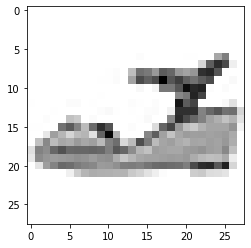

LABEL: 5


In [13]:
y_predicted_500 = best_mlp.predict(X_test)
y_predicted_5000= best_mlp_large.predict(X_test)
for i in range(0, len(X_test)):
    if y_predicted_500[i] != y_test[i]:
        if y_predicted_5000[i] == y_test[i]:
            break
print("Index ---> "+ str(i))
print("label 500 samples ---> " + str(y_predicted_500[i]))
print("label 10000 samples ---> " + str(y_predicted_5000[i]))
plot_input(X_test,y_test,i)

Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 10000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



Weights with 500 data points:


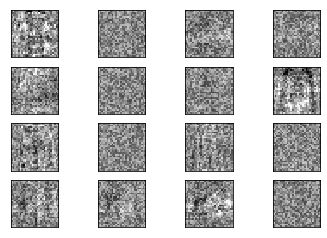

Weights with 5000 data points:


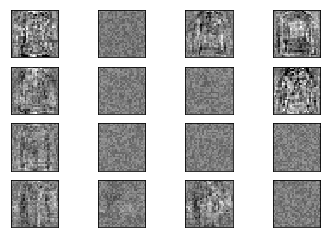

In [14]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp.coefs_[0].min(), best_mlp.coefs_[0].max()
for coef, ax in zip(best_mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 5000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## TO DO 9

Describe what do you observe by looking at the weights.

Looking at the weights we can observe how they tend to be more omogeneous and greyish when we enlarge the training set to 5000 samples in comparison of what we obtained with 500 samples, suggesting a decrease on the quantity of noise.

## TO DO 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

**[Logistic Regression]**
  

In [19]:
# ADD YOUR CODE
from sklearn import linear_model

lr = linear_model.LogisticRegression(max_iter = 1000).fit(X_train, y_train)

training_error_other = 1. - lr.score(X_train,y_train)

test_error_other = 1. - lr.score(X_test,y_test)

print ('RESULTS FOR OTHER CLASSIFIER\n')

print ("Best training error (other model): %f" % training_error_other)
print ("Best test error (other model): %f" % test_error_other)

RESULTS FOR OTHER CLASSIFIER

Best training error (other model): 0.050400
Best test error (other model): 0.175945


## TO DO 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

I chose a logistic regression classifier to do the comparison with the best NN architecture i found (one layer with 100 neurons). After training them with 5000 samples, the former obtained a training error of 0.050400 and a test error of 0.175945 and the latter had 0 training error and achieved a test error of 0.151273. Therefore NN with (100,) still remains the best classifier and it is to preferred. 

# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [20]:
#load the required packages

from sklearn import metrics
from sklearn.cluster import KMeans

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN.)

In [21]:
#let's consider only 2000 data points

X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

## TO DO 1
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state = ID. You can use the default setting for the other parameters.

In [22]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=ID).fit(X_train)

## Comparison of clusters with true labels

## TO DO 2
Now compare the obtained clusters with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

In [25]:
# compute and print the contingency matrix for the true labels vs the clustering assignments
y_test_predicted = kmeans.predict(X_test)
y_train_predicted = kmeans.predict(X_train)
matrix_train = sklearn.metrics.cluster.contingency_matrix(y_train, y_train_predicted)
matrix_test = sklearn.metrics.cluster.contingency_matrix(y_test, y_test_predicted)
print(matrix_train)
print()
print(matrix_test)

[[  0 138   4   0   1  36  14   5   1   6]
 [  0   9   1   0   0   5   4 175   0   0]
 [  0   3  56   0   0  62  13   1   1  76]
 [  0  55   3   0   0  25  11  90   0   0]
 [  0  26 108   0   0  32   3   4   0  39]
 [ 15   1   0   0  48   2 130   0   0   0]
 [  0  45  33   1   1  75  20   0   1  38]
 [  6   0   0   0 155   0  27   0   1   0]
 [  0   0   0  87   7  13  14   0  77   9]
 [154   0   0   0  22   3   7   0   1   0]]

[[   0 3442   39   27    1 1592  339  164   16  175]
 [   0  224   38    0    0  161  122 5225    1   35]
 [   0   81 1618   25    1 1718  300    6   18 2021]
 [   0 1657   58    8    0  754  341 2978    3   17]
 [   0  655 2811   23    0  957  139  143   11 1049]
 [ 457    2    0   11 1445   60 3813    2   14    0]
 [   2 1074 1066   20    5 2033  490   43   41 1012]
 [ 227    0    0    0 4963    1  605    0   15    0]
 [  12   25   40 2377  234  405  332   14 2049  305]
 [4780   10    6    2  740   54  188    3   28    2]]


## TO DO 3
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.

The best possible case occurs when the matrix is diagonal, a result that would suggest an accuracy of 100% in classification. However, this is certaintly not our case; matter of fact, the matrix seems far from perfect, with the majority of entries $A_{i,j}$ such that i != j that are different from zero, showing that the accuracy of our classificator is quite low.

## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## TO DO 4
Compute the clustering for k=2,3,...,15 (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [31]:
#run k-means with 10 choices of initial centroids for a range of values of n_clusters
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=ID).fit(X_train)
    silhouttescore = sklearn.metrics.silhouette_score(X_train, kmeans.predict(X_train), metric='euclidean')
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters=2: 0.19759683648501095
Silhoutte coefficient for number of clusters=3: 0.19138963408758325
Silhoutte coefficient for number of clusters=4: 0.18488295712462693
Silhoutte coefficient for number of clusters=5: 0.16611658608202415
Silhoutte coefficient for number of clusters=6: 0.15650300469889825
Silhoutte coefficient for number of clusters=7: 0.16735294043089566
Silhoutte coefficient for number of clusters=8: 0.15387058707873036
Silhoutte coefficient for number of clusters=9: 0.15591976908706262
Silhoutte coefficient for number of clusters=10: 0.13909505869155422
Silhoutte coefficient for number of clusters=11: 0.13829703898493653
Silhoutte coefficient for number of clusters=12: 0.13349338861473
Silhoutte coefficient for number of clusters=13: 0.12798974106194694
Silhoutte coefficient for number of clusters=14: 0.12820941116178283
Silhoutte coefficient for number of clusters=15: 0.12467546191529123


## TO DO 5

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.

Based only on the silhoutte scores calculated on the training set (i couldn't do it on the test set because it was too big) my choice would be to pick k = 2, that is, the higher score obtained among all the tested values of k (the higher the value, the furthest the sample is from neighboring clusters). However, we know that the MNIST dataset is divided in 10 different classes, so such value of k cannot be the correct one. A possible explanation for this mismatch is that in the feature space samples tend to group themselves in a way that a "supercluster" formed by of k clusters (each one corresponding to a class) — which may be separated one from the other — is produced. Nevertheless, the intra-distances between these k classes in this supercluster are somehow still very low compared to the inter-distance between the supercluster in which they are contained and another supercluster composed of the remaining j classes, with k + j = 10. Therefore, the model prefers to pick k = 2 to emphasize the division in these 2 superclusters.